<a href="https://colab.research.google.com/github/Shanks13-37/FinGuardAI_Tasks/blob/main/FinGuardAI_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Introduction

The dataset used in this project is **PaySim1**, a simulated mobile money transaction dataset generated using real financial transaction patterns.

It contains approximately 6 million transaction records that mimic the behavior of users making mobile money transfers.  
The dataset includes various transaction types such as `CASH_OUT`, `PAYMENT`, `TRANSFER`, `CASH_IN`, and `DEBIT`.  

Each record represents a single transaction and includes details like:
- Transaction type  
- Transaction amount  
- Original and destination account balances  
- Whether the transaction was fraudulent (`isFraud` column)

For analysis and computation efficiency, a subset of  around 100000 transactions was used while retaining all fraud instance.
## Data Preprocessing Steps

The following preprocessing steps were performed to prepare the dataset for analysis and modeling:

1. **Load and Explore Dataset**
   - Loaded the PaySim1 dataset using pandas.
   - Explored shape, data types, and summary statistics using `.info()`, `.describe()`, and `.value_counts()`.

2. **Handle Missing Values**
   - Checked for missing values using `.isnull().sum()`.
   - This dataset has no null entries.

3. **Drop Unnecessary Columns**
   - Dropping columns like `nameOrig`, `nameDest`, and `isFlaggedFraud` as they do not contribute to fraud prediction.

4. **Remove Duplicates**
   - Checked and removed duplicate rows using `.duplicated().sum()` and `.drop_duplicates()`.

5. **Handle Outliers**
   - Detected outliers in transaction `amount` using boxplots.
   - Clipped extreme values at the 1st and 99th percentiles to minimize skewness.

6. **Data Type Correction**
   - Converted `type` column to categorical using `.astype('category')`.

7. **Feature Encoding**
   - Applied `LabelEncoder` to convert transaction types into numeric codes for model compatibility.

8. **Train-Test Split**
   - Split the dataset into training (80%) and testing (20%) sets using `train_test_split()` with stratification to maintain class balance.

9. **Handle Class Imbalance**
   - Applied **SMOTE (Synthetic Minority Oversampling Technique)** to the training set to balance the fraud and non-fraud classes.

10. **Feature Scaling / Normalization**
    - Applied `StandardScaler` to normalize numeric features (mean = 0, std = 1) and improve model performance.

Each step included one-line markdown explanations describing the reason for using the technique.

##**Libraries Used:**  
  - pandas, numpy, matplotlib, seaborn  
  - scikit-learn, imbalanced-learn

  ## Exploratory Data Analysis (EDA) Results

1. **Summary Statistics**

2. **Distribution of Numeric Columns**

3. **Fraud vs Non-Fraud Comparison**

4. **Transaction Amounts by Fraud Status**

5. **Correlation Heatmap**

6. **Transaction Type Analysis**

7. **Transaction Time Trends**


In [39]:
import kagglehub
ealaxi_paysim1_path = kagglehub.dataset_download('ealaxi/paysim1')

print('Data source import complete.')


Using Colab cache for faster access to the 'paysim1' dataset.
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv


# **Load the dataset**
> Load the data set and check its structure:

In [3]:
df = pd.read_csv('/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv')

In [4]:
df.shape

(6362620, 11)

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
fraud_counts = df['isFraud'].value_counts()
fraud_percent = (fraud_counts / len(df)) * 100

print("Fraud vs Non-Fraud Counts:")
print(fraud_counts)
print("\nPercentage Distribution:")
print(fraud_percent)

Fraud vs Non-Fraud Counts:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Percentage Distribution:
isFraud
0    99.870918
1     0.129082
Name: count, dtype: float64


# **Reducing the Dataset**
Since the original PaySim1 has over 6million transactions, we sample around 100k of them, keeping all fraud cases to preserve the fraud ratio and prevent loosing important fraud flag info.

In [10]:
fraud = df[df['isFraud'] == 1]
non_fraud = df[df['isFraud'] == 0].sample(n=100000, random_state=42)

df = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=42).reset_index(drop=True)

print(df.shape)

(108213, 11)


In [11]:
fraud_counts = df['isFraud'].value_counts()
fraud_percent = (fraud_counts / len(df)) * 100

print("Fraud vs Non-Fraud Counts:")
print(fraud_counts)
print("\nPercentage Distribution:")
print(fraud_percent)

Fraud vs Non-Fraud Counts:
isFraud
0    100000
1      8213
Name: count, dtype: int64

Percentage Distribution:
isFraud
0    92.410339
1     7.589661
Name: count, dtype: float64


# **Handle Missing Values**
> No missing values detected



In [12]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


# **Drop Unnecessary Columns**
The columns 'nameOrig', 'nameDest' and 'isFlaggedFraud' do not give us useful information for fraud detection so dropping them will simplify the dataset.

In [13]:
df = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

# **Check and Remove duplicates**
We check for duplicates and, if they exist, drop them using .drop_duplicates() to avoid redundancy.

In [14]:
df.duplicated().sum()

np.int64(16)

In [15]:
df=df.drop_duplicates()
print(df.shape)
print(df.columns)

(108197, 8)
Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')


# **Detecting and Handeling Outliers**
* Plotting using boxplot shows whether any values lie far outside the "box"

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

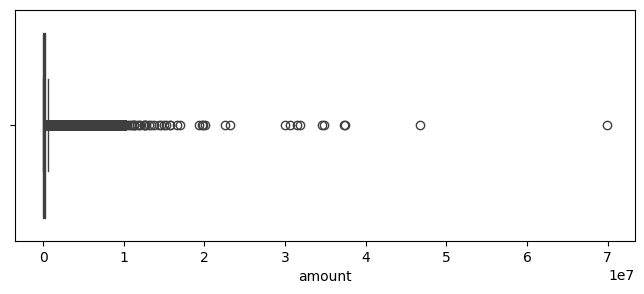

In [17]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['amount'])
plt.show()

In this dataset, there might be high value outliers which might indicate fraud, so instead of removing them, we applied clipping which keeps the data range without deleting them but just replaces them with values chosen as boundary values (here is clipped at 99th percentile)

In [18]:
lower=df['amount'].quantile(0.01)
upper=df['amount'].quantile(0.99)
df['amount'] = df['amount'].clip(lower, upper)

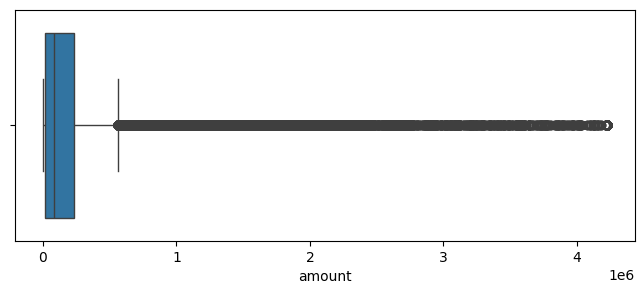

In [19]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['amount'])
plt.show()

Applied similar clipping to other financial features to minimize skewness from extreme balance values.

In [20]:
cols_to_clip = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in cols_to_clip:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

# **Data type correction**
> Ensuring numerical and categorical features have correct data types.

In [21]:
df['type']= df['type'].astype('category')

# **Feature Encoding**
> converting the feature 'type', which is categorical, to numerical.
**Applied Label Encoding on categorical columns to convert text labels into numeric form for model compatibility.**

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

Since our dataset is more compact and has only a few categories, we used LabelEncoder

# **Splitting**

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop('isFraud', axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# **Handeling Imbalanced Data**

isFraud
0    100000
1      8197
Name: count, dtype: int64


/tmp/ipython-input-484792672.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='cool')


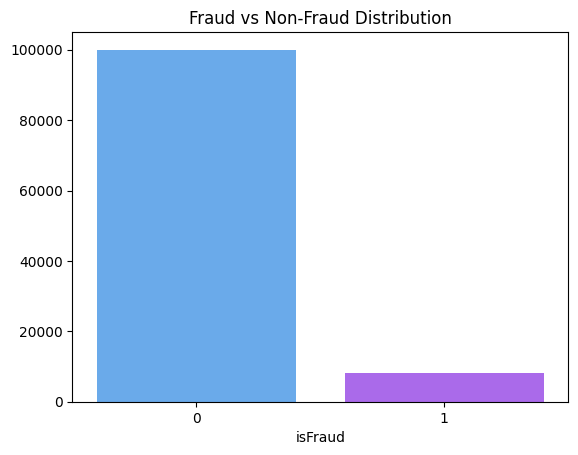

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fraud_counts = df['isFraud'].value_counts()
print(fraud_counts)

sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='cool')
plt.title('Fraud vs Non-Fraud Distribution')
plt.show()

Here, the dataset is clearly skewed towards non-fraud, and since fraud cases are rare compared to normal ones, we use **SMOTE** Synthetic Minority Oversampling Technique to balance the data and help the model learn better from the fraud patterns.

In [25]:
!pip install -U imbalanced-learn

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# **Feature Scaling or Normalization**

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


In [29]:
import pandas as pd
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_res.columns)
X_train_scaled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-0.128315,0.603443,-0.570748,-0.423725,-0.213506,-0.398029,-0.489257
1,-0.675794,-0.750790,-0.486475,-0.437854,-0.231421,-0.327567,-0.393676
2,0.270889,-1.427906,-0.291010,-0.101030,0.368332,0.166643,-0.174972
3,-1.263195,1.280560,3.303021,3.037886,-0.231421,-0.398029,-0.489257
4,-0.664389,0.603443,-0.554397,-0.433563,-0.231421,-0.398029,-0.489257


#  **EDA :-**

### 1. Fraud vs Non-Fraud distribution
> Visualizes class imbalance between fraud and non-fraud transactions.
Fraud transactions are much fewer, confirming the need for resampling methods like SMOTE.

/tmp/ipython-input-1124170798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=df, palette='PiYG')


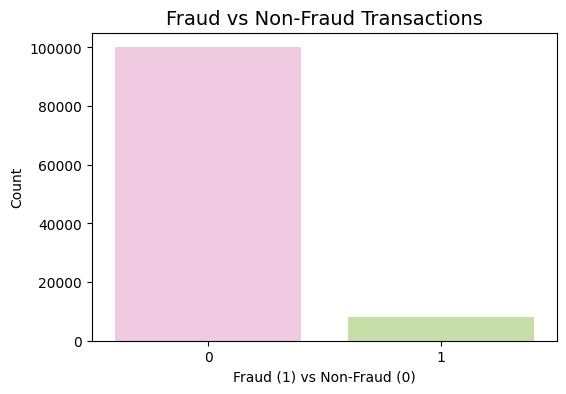

isFraud
0    92.424004
1     7.575996
Name: proportion, dtype: float64


In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=df, palette='PiYG')
plt.title('Fraud vs Non-Fraud Transactions', fontsize=14)
plt.xlabel('Fraud (1) vs Non-Fraud (0)')
plt.ylabel('Count')
plt.show()

print(df['isFraud'].value_counts(normalize=True) * 100)

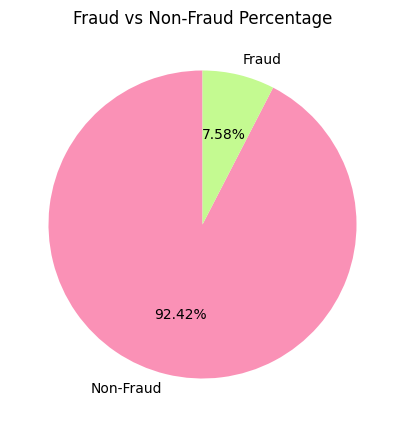

In [31]:
plt.figure(figsize=(5,5))
labels = ['Non-Fraud', 'Fraud']
plt.pie(fraud_counts, labels=labels, autopct='%1.2f%%', startangle=90, colors=['#FA91B6','#C4FA91'])
plt.title('Fraud vs Non-Fraud Percentage')
plt.show()

### 2. Distribution of Numeric Features
> Histograms show the spread and skewness of numeric features like amount and balances, useful for detecting outliers

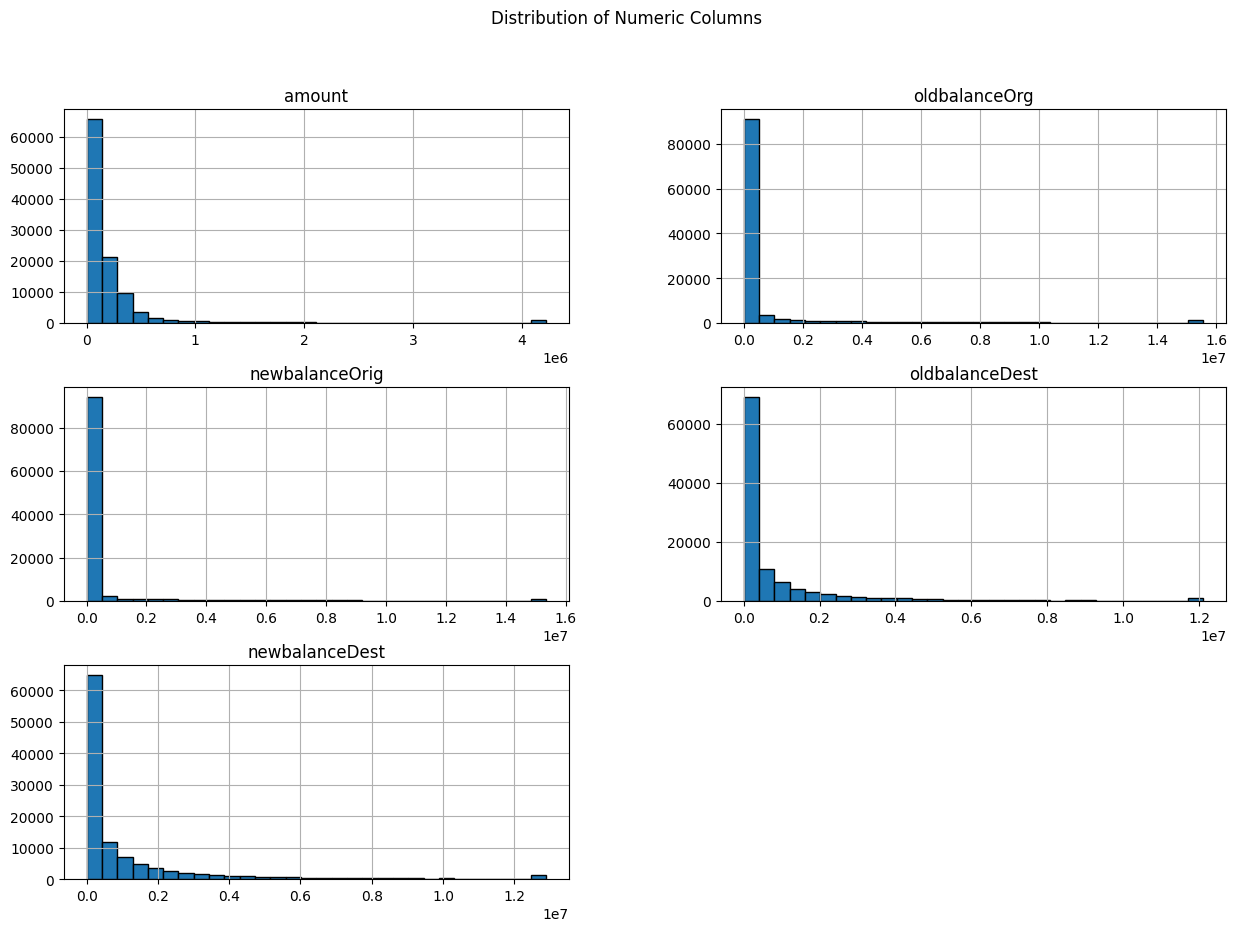

In [32]:
num_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

df[num_cols].hist(bins=30, figsize=(15,10), edgecolor='black')
plt.suptitle('Distribution of Numeric Columns')
plt.show()

### 3. Heatmap

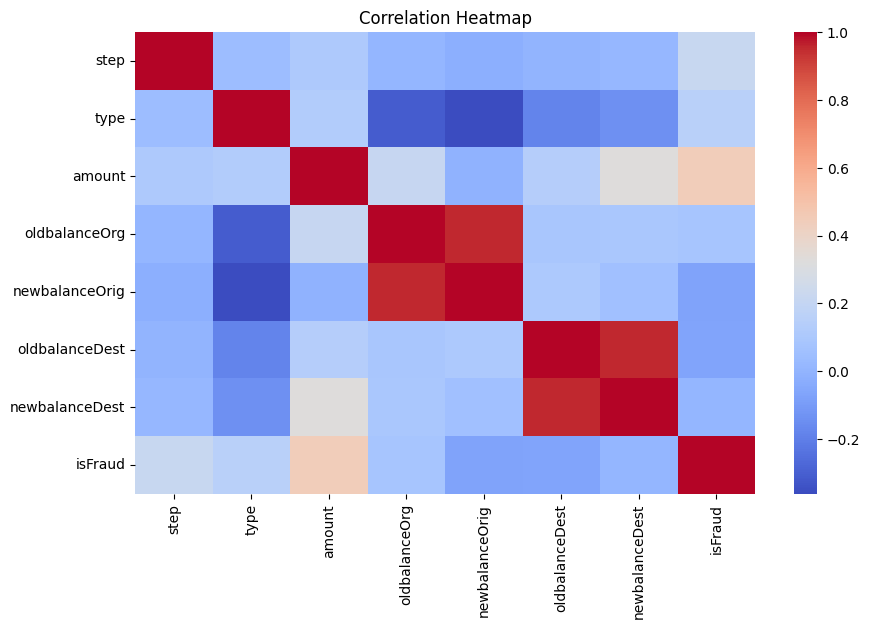

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 4. Compare fraud vs Non-Fraud

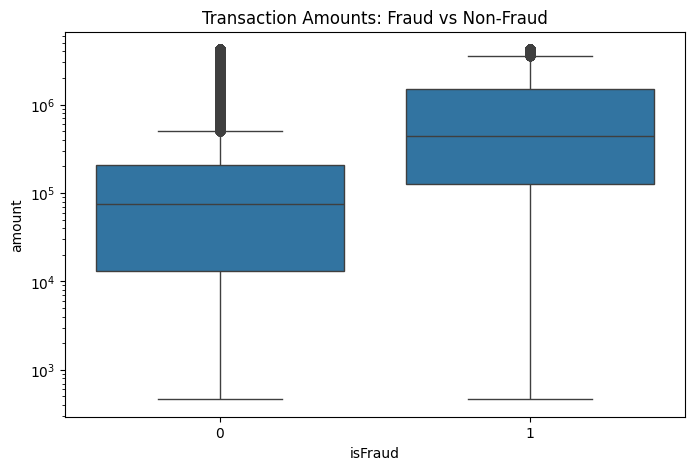

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.yscale('log')
plt.title('Transaction Amounts: Fraud vs Non-Fraud')
plt.show()

### 5. Correlation of the features with the Target (isFraud):

In [36]:
target_corr = df.corr()['isFraud'].sort_values(ascending=False)
print(target_corr)

isFraud           1.000000
amount            0.441664
step              0.214852
type              0.149418
oldbalanceOrg     0.082423
newbalanceDest    0.009192
oldbalanceDest   -0.067081
newbalanceOrig   -0.069842
Name: isFraud, dtype: float64


### 6. Type Analysis (amount):

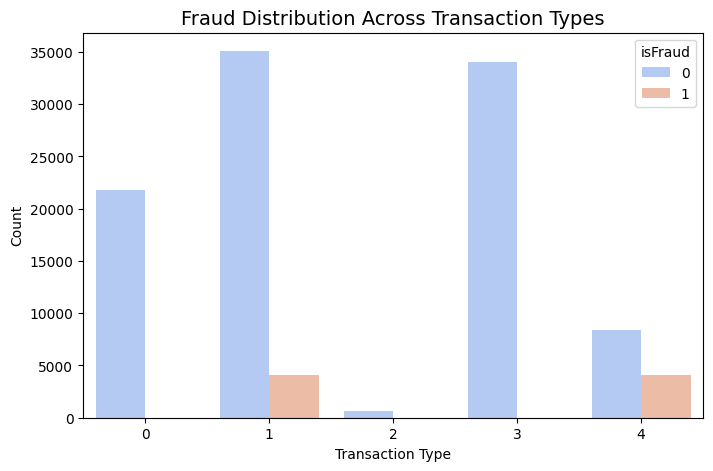

In [37]:
if 'type' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x='type', hue='isFraud', data=df, palette='coolwarm')
    plt.title('Fraud Distribution Across Transaction Types', fontsize=14)
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.show()


### 7. Transaction Time Trends (step):

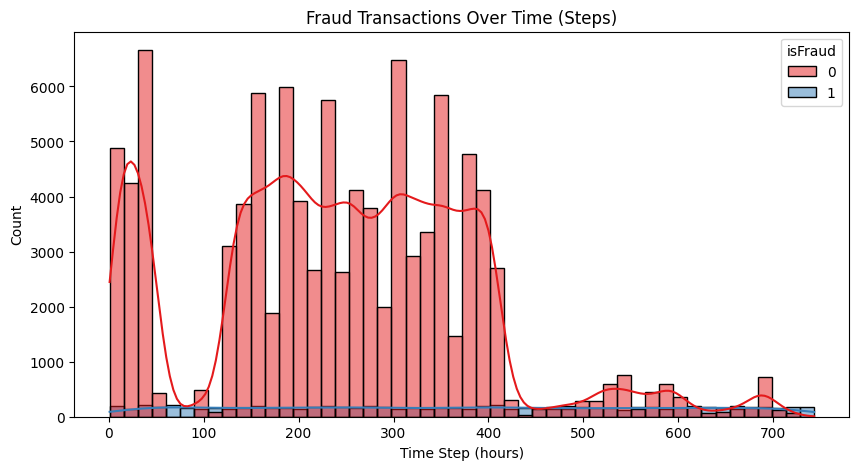

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='step', hue='isFraud', bins=50, kde=True, palette='Set1')
plt.title('Fraud Transactions Over Time (Steps)')
plt.xlabel('Time Step (hours)')
plt.show()